In [13]:
import numpy as np
from matplotlib import pyplot as plt

# Integração Numérica

Formas inteligêntes de realizar integração numericamente e noção básica sobre limites de precisão.

# 1 - Método dos trapézios

A imagem clássica da integração numérica é utilizar um grande número de retângulos cujas alturas são iguais aos valores da função num ponto, isto é ok, mas gera erros da ordem de $h$ (o tamanho da base de cada retângulo).

Um meio melhor seria utilizar trapézios ao invés de retângulos, o que gera erros de ordem $h^2$.

In [2]:
def I_trap(y,a,b,n):
    # com n intervalos, h é o tamanho da base de cada trapézio
    h = (b-a)/n
    x = np.arange(a,b,h)
    I=0
    for i in range (len(x)-1):
        I = I + h*(y(x[i])+y(x[i+1]))/2
        
    return I

Para testar, vamos integrar a função $6-6x^5$, cuja solução analítica é fácil de calcular ($6x-x^6$).

In [3]:
def y(x):
    return 6-6*x**5

# integrando de 0 à 1 devemos ter como resultado 5.

I_trap(y, 0, 1, 100)

4.998279706496999

Outro exemplo de aplicação, agora mais complicado, é o do período de um pêndulo.

Pela aproximação de Galileu (para oscilações pequenas) o período de um pêndulo de comprimento $l$ sujeito à uma aceleração $g$ é: $T_g = 2\pi \sqrt{\frac{l}{g}}$

In [4]:
pi = np.math.pi
g = 10
l = 1

# Período galileano em segundos (Ângulo inicial pequeno)
Tgal = 2*pi*np.sqrt(l/g)
print(Tgal)

1.9869176531592203


Se quisermos saber o período de um pêndulo sem nos limitar apenas à pequenas oscilações, precisamos realizar a seguinte integral meio complicada:

$T(\theta_0) = 4\sqrt{\frac{l}{g}}\int_{0}^{\pi/2}\frac{dt}{\sqrt{1-(sin(t) sin(\theta_0))^2}}$

In [5]:
# função do pêndulo a ser integrada
def pend(x):
    return 1/np.sqrt(1-((np.sin(x))*k)**2)

# cálculo do período do pêndulo (2000 intervalos na integração)
def T(theta_0):
    return 4*np.sqrt(l/g)*I_trap(pend, 0, pi/2, 2000)


# Vamos testar vários valores de ângulo inicial
th0 = np.linspace(0,3*pi/2, 100)
t = np.zeros(len(th0))

print('theta_0  -  T')
for i in range (len(th0)):
    k = np.sin(th0[i]/2)
    t[i] = T(th0)
    print(th0[i],t[i])    

theta_0  -  T
0.0 1.9859241943325612
0.04759988869075444 1.986205315522315
0.09519977738150888 1.9870491169038598
0.14279966607226333 1.9884569138661607
0.19039955476301776 1.9904309052467073
0.2379994434537722 1.9929741831801167
0.28559933214452665 1.9960907470162446
0.3331992208352811 1.9997855214405516
0.3807991095260355 2.004064378971105
0.42839899821678995 2.0089341670511724
0.4759988869075444 2.014402740004686
0.5235987755982988 2.0204789961749117
0.5711986642890533 2.027172920625169
0.6187985529798077 2.034495633846045
0.6663984416705622 2.042459446987332
0.7139983303613165 2.0510779242164268
0.761598219052071 2.060365952900308
0.8091981077428255 2.070339822417873
0.8567979964335799 2.0810173125352955
0.9043978851243344 2.092417792423803
0.9519977738150888 2.104562331569272
0.9995976625058433 2.117473824022786
1.0471975511965976 2.1311771276749774
1.0947974398873521 2.14569922051371
1.1423973285781066 2.161069376151483
1.189997217268861 2.1773193612986472
1.2375971059596154 2.19

Agora plotamos a razão entre o período real e o período de Galileu para vários valores de ângulo inicial para comparar:

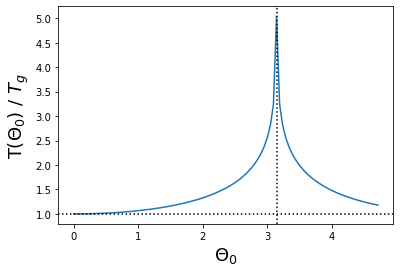

In [7]:
# plot do período com theta entre 0 e 3*pi/2

plt.plot(th0, t/Tgal)
plt.xlabel("$\Theta_{0}$",fontsize=18)
plt.ylabel("T($\Theta_{0}$) / $T_g$",fontsize=18)
plt.axhline(y=1,ls=':',c='k')
plt.axvline(x=pi,ls=':',c='k')

# 2 - Método de Simpson

Similar ao método dos trapézios, exceto que agora nós usamos seções de parábolas para modelar a corva que queremos integrar. Assim nos rende um erro da ordem de $h^3$.

In [8]:
def I_simp(y,a,b,n):
    h = (b-a)/n
    x = np.arange(a,b,h)
    n = len(x)
    I = h*(y(a)+y(b))/3
    for i in range (1,n,2):
        I = I + 4*h*y(x[i])/3
    for i in range (2,n,2):
        I = I + 2*h*y(x[i])/3
    
    return I   

# testando naquela função do começo (tem que dar 5)
I_simp(y,0,1,100)

4.99999998

Agora vamos comparar os limites de precisão da integração numérica devido o fato de estarmos trabalhando num sistema que guarda os números na memória com precisão simples (32 bits) ou precisão dupla (64 bits, o padrão para python 3),

In [10]:
# integral em função do numero de intervalos e com precisão simples
def I_simpl(y,a,b,n):
    # tamanho do intervalo
    h = np.float32((b-a)/n)
    x = np.arange(a,b,h)
    #valores iniciais e finais
    I = h*(np.float32(y(a))+np.float32(y(b)))/3
    #somando os pares
    for i in range (1,n,2):
        I = I + 4*np.float32(h*np.float32(y(x[i]))/3)
    #somando os ímpares
    for i in range (2,n,2):
        I = I + 2*np.float32(h*np.float32(y(x[i]))/3)
    
    return I   


# integral em função do numero de intervalos e com precisão dupla
def I_simpd(y,a,b,n):
    h = (b-a)/n
    x = np.arange(a,b,h)
    I = h*(y(a)+y(b))/3
    for i in range (1,n,2):
        I = I + 4*h*y(x[i])/3
    for i in range (2,n,2):
        I = I + 2*h*y(x[i])/3
    
    return I   

print(I_simpl(y,0,1,100), '-', I_simpd(y,0,1,100))

4.9999999741557986 - 4.99999998


In [12]:
'DEMORA MUITO, NÃO RODAR MAIS!!!'

# tabela para erro em precisão simples
Int = np.zeros(25)
err = np.zeros(25)

# tabela para erro em precisão dupla
Intd = np.zeros(25)
errd = np.zeros(25)

# ordem - nª intervalos (2^p) - valor da integral - erro absoluto
print('p - N - I - erro')
for p in range (1, 26,1):
    Int[p-1] = I_simpl(y,0,1,2**p)
    err[p-1] = np.abs(I_simpl(y,0,1,2**p)-5)
    #print('\n', p, 2**p,Int[p-1],err[p-1])
    
    Intd[p-1] = I_simpd(y,0,1,2**p)
    errd[p-1] = np.abs(I_simpd(y,0,1,2**p)-5)

p - N - I - erro


Text(0, 0.5, '$log(e)$')

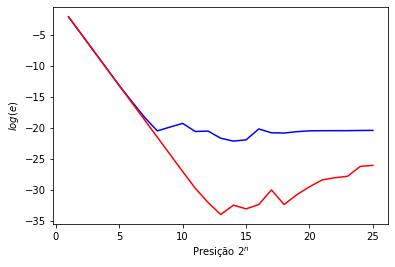

In [14]:
p = np.arange(1, 26, 1)
plt.plot(p,np.log(err), c='b')
plt.plot(p,np.log(errd), c='r')
plt.xlabel('Presição $2^n$')
plt.ylabel('$log(e)$')

Deste gráfico dá pra perceber que a partir de uma determinada precisão, por volta de $n\approx3^{7}$, os erros de arredondamento de números de precisão simples se tornam significativos e aumentar o número de intervalos de integração não contribui em nada para melhorar a estimativa do método numérico. No caso da precisão dupla os erros começam a se tornar significativos por volta de $n\approx2^{14}$.

# 3 - Método de Monte-Carlo

Agora um outro método de integração completamente diferente é usar números aleatórios para realizar o cálculo pra nós!

A função abaixo produz uma sequência de números pseudo-aleatórios entre 0 e 1, a partir de uma dada seed:

In [16]:
# função pseudo-aleatória uniforme de 0 a 1
def rand(seed):
    a = 16807
    m = 2147483647
    seed=np.mod(a*seed,m)
    return seed/m

rand(9336688)

0.07236794804798809

Para verificar que essa sequência realmente produz números com uma distribuição aleatória, vamos produzir vários deles e ver com quê frequência eles caem em determinados intervalos. Se a distribuição for realmente aleatória esperamos que eles sejam uniformemente distribuídos nos cinco intervalos, o que significa que cada intervalo deverá conter por volta de $20\%$ dos valores produzidos.

0.19 0.21 0.24 0.24 0.12


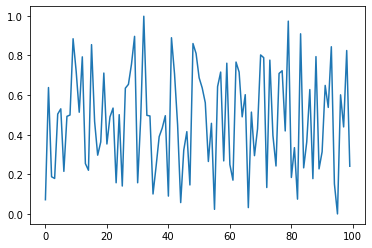

In [17]:
f = 100
r = np.zeros(f)
seed = 9336688

unif=np.zeros(5)

for i in range (0,f,1):
    r[i] = rand(seed)
    if r[i] < 0.2:
        unif[0]=unif[0]+1
    else:
        if r[i] <= 0.4:
            unif[1] = unif[1]+1
        else:
            if 0.4 < r[i] < 0.6:
                unif[2] = unif[2]+1
            else:
                if 0.6 <= r[i] <0.8:
                    unif[3] = unif[3]+1
                else:
                    unif[4] = unif[4]+1
    
    seed = rand(seed)*10**8

# plota a distribuição e printa as frequências
pl.plot(r)
print(unif[0]/f,unif[1]/f,unif[2]/f,unif[3]/f,unif[4]/f)

Um exercício clássico é usar números aleatórios pra determinar a área de um círculo de raio 1 ($A=\pi R^2 = \pi$).

Vamos produzir vários pares de números aleatórios que usaremos como as coordenadas ($x,y$) de pontos num plano cartesiano. Destes pontos, aqueles que se encontrarem dentro do círculo (que obedecem a equação $x^2+y^2<1$) serão lembrados. No final, depois de produzir muitissimos pares, a razão entre o nº de pontos dentro do círculo e o nº total de pontos gerados será próxima da razão entre a área do círculo ($\pi$) e a área do quadrado onde geramos todos os pontos ($1$), ou seja, estaremos essencialmete calculando o valor de $\pi$!

In [18]:
 #Calcula a área do circulo jogando n pontos
def Acirc(seed,n):
    s = seed
    nd = 0
    for i in range (n):
        xr = rand(s)
        #atualizamos a seed
        s = rand(s)*10**8
        yr = rand(s)
        if yr < np.sqrt(1-xr**2):
            #se o ponto estiver dentro, lembramos dele
            nd = nd + 1
        s = rand(s)*10**8
    return 4*nd/n

# testando com 100 pontos
Acirc(9336688, 100)

3.4

Podemos fazer uma análise de como este método converge ao usarmos números de pontos cada vez maiores.

In [19]:
# Funções estatísticas básicas
def media(x):
    n = len(x)
    return np.sum(x)/n
    
def desv_p(x):
    n = len(x)
    return np.sum((x-media(x))**2)/(n-1)

def desv_pm(x):
    n = len(x)
    return desv_p(x)/np.sqrt(n)
    

x = np.array([1,2,3,4,5])
print('media, desvp, desvpm\n',media(x),' ',desv_p(x),' ',desv_pm(x))

media, desvp, desvpm
 3.0   2.5   1.118033988749895


In [522]:
# tabela para erro em precisão dupla
seed = 9336688
N = 2

print('N - Im - \u03C3 - \u03C3m')
while N <= 131072:
    I = np.zeros(N)
    for i in range (N):
        I[i] = Acirc(seed, 100)
        seed = rand(seed)*10**8
    print('\n', N, '-', media(I),'-',desv_p(I),'-',desv_pm(I))
    N = N*2

N - Im - σ - σm

 2 3.2800000000000002 0.0031999999999999702 0.002262741699796931

 4 3.29 0.0035999999999999765 0.0017999999999999882

 8 3.2800000000000002 0.0018285714285714116 0.0006464976285134089

 16 3.3075 0.003566666666666653 0.0008916666666666632

 32 3.3137499999999998 0.002901612903225801 0.0005129375400623373

 64 3.131875 0.009532936507936515 0.0011916170634920643

 128 3.0778124999999994 0.010540059055118126 0.0009316184039975876

 256 3.18390625 0.00971017156862744 0.000606885723039215

 512 3.1071874999999998 0.007331409001956952 0.00032400556380849114

 1024 3.141640625 0.02916016006842619 0.0009112550021383184

 2048 3.0936328125 0.025695443026380077 0.0005677944377983105

 4096 3.1541796875 0.021235370879120873 0.00033180266998626364

 8192 3.1196435546875 0.018375748892648945 0.0002030252601777072

 16384 3.1248706054687503 0.02647877224461904 0.00020686540816108626

 32768 3.121298828125 0.02790004339350566 0.00015412742092927177

 65536 3.1628491210937506 0.02648